In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [5]:
data=pd.read_csv('heart_disease_data.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns Descriptions:

1.   age :(Age of the patient in years)
2.   sex: (Male/Female)
3.   cp: chest pain type
4.   trestbps: resting blood pressure
5.   chol :serum cholesterol in mg/dl
6.   fbs: fasting blood sugar > 120 mg/dl
7.   restecg: resting electrocardiographic results
8.   thalach: maximum heart rate achieved
9.   exang: exercise-induced angina
10.  oldpeak: ST depression induced by exercise relative to rest
11.  slope: the slope of the peak exercise ST segment
12.  ca: number of major vessels
13.  thal: [normal; fixed defect; reversible defect]
14.  target: the predicted attribute

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
x=data.drop(['target'],axis=1)

In [9]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
y=data['target']

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
train_data=x_train.join(y_train)

In [15]:
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1


<Axes: >

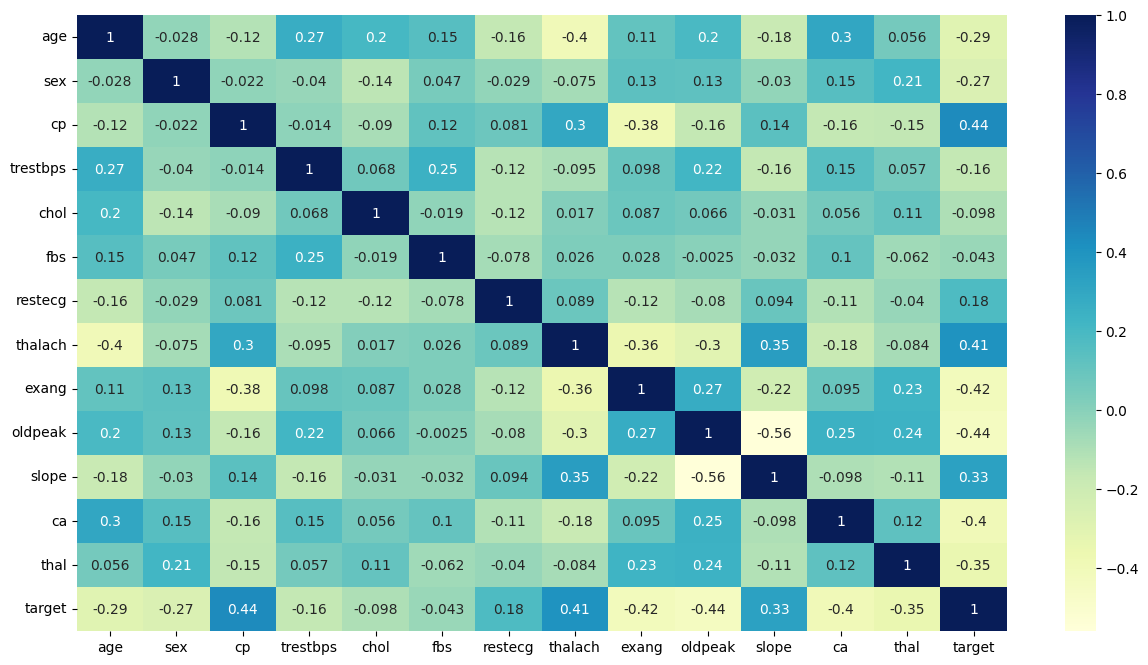

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
reg=LogisticRegression()

In [19]:
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
test_data=x_test.join(y_test)

In [21]:
reg.score(x_test,y_test)

0.8524590163934426

Accuracy score

In [22]:
#accuracy on training Data
x_train_prediction = reg.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [24]:
training_data_accuracy

0.8429752066115702

In [26]:
#accuracy on testing data
x_test_prediction=reg.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [27]:
test_data_accuracy

0.8524590163934426

Building a Predictive System

In [29]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
